<a href="https://colab.research.google.com/github/fwang312/Hands-On-Machine-Learning-/blob/master/Customer_Segementation(Udemy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
import os
os.chdir("/content/gdrive/My Drive/Project/Customer Analytics")
!ls

'segmentation data.csv'  'segmentation data legend.xlsx'   Untitled0.ipynb


## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans

In [0]:
df_segamentation = pd.read_csv('segmentation data.csv',index_col=0)

In [46]:
df_segamentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [47]:
df_segamentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [48]:
df_segamentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


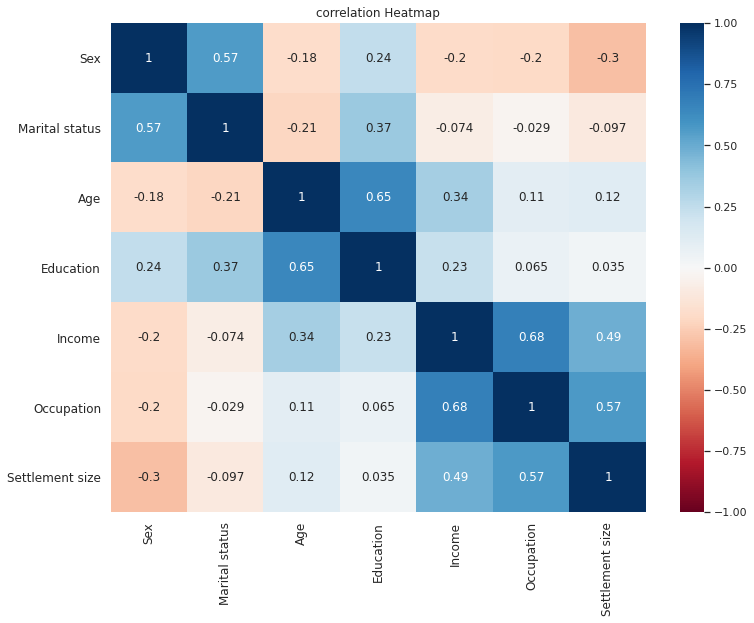

In [49]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df_segamentation.corr(),
             annot = True,
             cmap = 'RdBu',
             vmin = -1,
             vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('correlation Heatmap')
plt.show()

### Visulize Raw Data


Text(0.5, 1.0, 'Visualization of raw data')

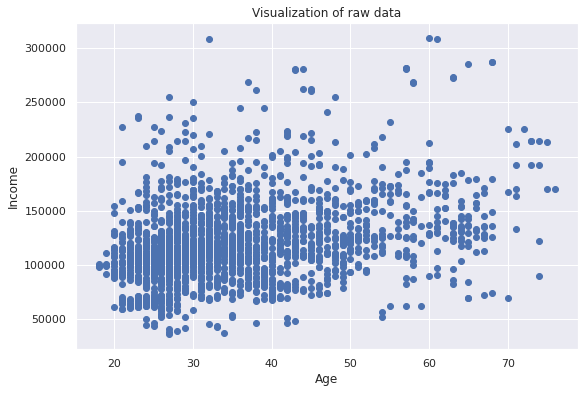

In [50]:
plt.figure(figsize = (9,6))
plt.scatter(df_segamentation.iloc[:, 2],df_segamentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

### Standardization

In [0]:
scaler = StandardScaler()
segementation_std = scaler.fit_transform(df_segamentation)

## Hierarchical


In [0]:
hier_clust = linkage(segementation_std, method='ward')

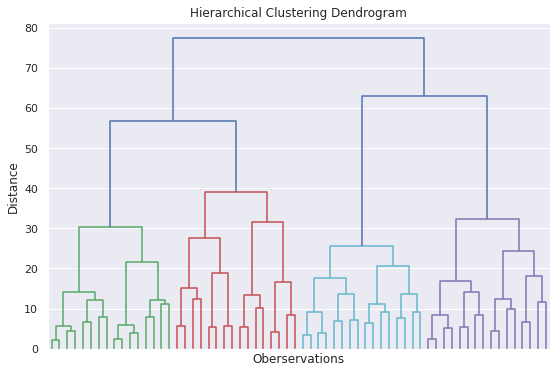

In [53]:
plt.figure(figsize=(9,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Oberservations')
plt.ylabel('Distance')

dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

In [0]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
  kmeans.fit(segementation_std)
  wcss.append(kmeans.inertia_)

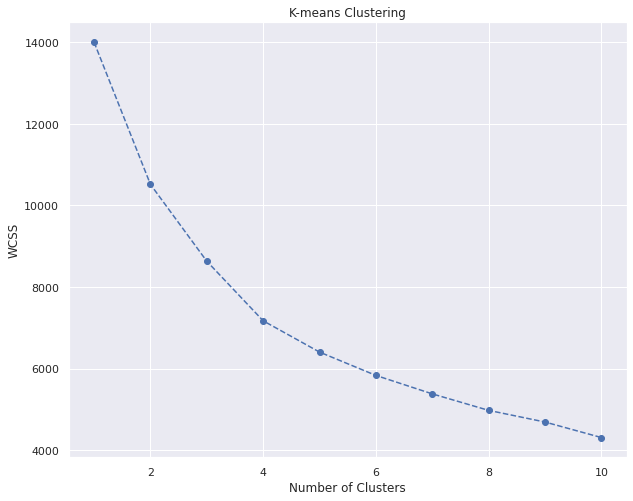

In [55]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,marker = 'o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [56]:
kmeans = KMeans(n_clusters = 4,init = 'k-means++',random_state=42)
kmeans.fit(segementation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## Result

In [0]:
df_segm_kmeans = df_segamentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [58]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [0]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

In [0]:
df_segm_analysis['Prob Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [61]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prob Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
